In [27]:
# # Number of samples:
# nSamples = 44;
# # AB/2 spacing:
# OA =     [0.0139790406440197, 0.0205184256193513, 0.0301169300968417, 0.0442056079391693, 0.0648849589579011, 0.0952380952380952, 0.139790406440197, 0.205184256193513, 0.301169300968417, 0.442056079391693, 0.648849589579011, 0.952380952380952, 1.39790406440197, 2.05184256193513, 3.01169300968417, 4.42056079391693, 6.48849589579011, 9.52380952380952, 13.9790406440197, 20.5184256193513, 30.1169300968417, 44.2056079391693, 64.8849589579011, 95.2380952380952, 139.790406440197, 205.184256193513, 301.169300968417, 442.056079391693, 648.849589579011, 952.380952380952, 1397.90406440197, 2051.84256193513, 3011.69300968417, 4420.56079391693, 6488.49589579011, 9523.80952380952, 13979.0406440197, 20518.4256193513, 30116.9300968417, 44205.6079391693, 64884.9589579011, 95238.0952380952, 139790.406440197, 205184.256193513];

# # Computation of resistivity transform adapted from Koefoed (1970) by Ghosh (1971)
# def resistivityTransform(resistivities, thicknesses, OA) :
#     y=np.diff(np.log(OA))[0] # in ghosh transform y is log(u) and u is exp(y). Y is spacing of log distances
#     # y is close to 0.38 for the OA given in this example
#     u=np.exp(y) # u = 1.468 given y=0.38
#     # Number of layers (basement include):
#     nLayers = len(resistivities)
#     nSamples= len(OA)
#     # Resistivity transforms:
#     RT = []
# #     RT.length = nSamples;
    
# #     T = []
# #     T.length = nSamples - 1;
# #     var index;
    
#     for i in range(nSamples):
#         T=[]
#         index = 0;
#         K = (resistivities[nLayers-1] - resistivities[nLayers -2])/(resistivities[nLayers-1] + resistivities[nLayers-2])
# #         print(K)
#         T.append( resistivities[nLayers-2] * (1 + K * np.exp(-2*thicknesses[nLayers-2]/OA[i]))/(1 - K * np.exp(-2*thicknesses[nLayers-2]/OA[i])))
        
#         for j in range(nLayers-3,-1,-1):
#             Tab = resistivities[j]*(1-np.exp(-2*thicknesses[j]/OA[i]))/(1+np.exp(-2*thicknesses[j]/OA[i]));
# #             index += 1;
#             T.append((Tab+T[-1])/(1+Tab*T[-1]/(resistivities[j]*resistivities[j])));
#         RT.append(T[-1]);
    
#     return RT;


# # // Compute apparent resistivity curve using Ghosh's linear filter.
# # // Ghosh, D.P., 1971, Inverse filter coefficients for the computation of apparent resistivity, Geophysical Prospecting 19, 769-775
# def ghoshFilter(resistivities, thicknesses, OA):
# #     // Filter coefficients
#     b = [0.0225,-0.0499,0.1064,0.1854,1.9720,-1.5716,0.4018,-0.0814,0.0148]
    
# #     // Compute resistivity transform
#     RT = resistivityTransform(resistivities, thicknesses, OA);
    
# #     // Compute apparent resistivities
#     apparentResisitivies = [];
#     apparentResisitivies = np.zeros(nSamples);
#     for i in range( 10,38):
#         apparentResisitivies[i] = 0;
#         for j in range(-3,6):
#             apparentResisitivies[i] += b[j+3]*RT[i-j*2]
#     return apparentResisitivies,RT


# def getApparentResisityCurve(resistivities, thicknesses, OA):
    
#     appRes,RT = ghoshFilter(resistivities, thicknesses, OA);
    
#     apparentResistivities = [];
#     halfSpacing = [];
#     rt=[]
    
#     for i in range(13,36):
#         apparentResistivities.append(appRes[i]);
#         halfSpacing.append(OA[i]);
#         rt.append(RT[i])
    
    
#     return halfSpacing, apparentResistivities,rt



# Computation of resistivity transform adapted from Koefoed (1970) by Ghosh (1971)
def resistivityTransform(resistivities, thicknesses, OA) :
    y=np.diff(np.log(OA))[0] # in ghosh transform y is log(u) and u is exp(y). Y is spacing of log distances
    # y is close to 0.38 for the OA given in this example
    u=np.exp(y) # u = 1.468 given y=0.38
    # Number of layers (basement include):
    nLayers = len(resistivities)
    nSamples= len(OA)
    # Resistivity transforms:
    RT = []
#     RT.length = nSamples;
    
#     T = []
#     T.length = nSamples - 1;
#     var index;
    
    for i in range(nSamples):
        T=[]
        index = 0;
        K = (resistivities[nLayers-1] - resistivities[nLayers -2])/(resistivities[nLayers-1] + resistivities[nLayers-2])
#         print(K)
        T.append( resistivities[nLayers-2] * (1 + K * np.exp(-2*thicknesses[nLayers-2]/OA[i]))/(1 - K * np.exp(-2*thicknesses[nLayers-2]/OA[i])))
        
        for j in range(nLayers-3,-1,-1):
            Tab = resistivities[j]*(1-np.exp(-2*thicknesses[j]/OA[i]))/(1+np.exp(-2*thicknesses[j]/OA[i]));
#             index += 1;
            T.append((Tab+T[-1])/(1+Tab*T[-1]/(resistivities[j]*resistivities[j])));
        RT.append(T[-1]);
    
    return RT;


# // Compute apparent resistivity curve using Ghosh's linear filter.
# // Ghosh, D.P., 1971, Inverse filter coefficients for the computation of apparent resistivity, Geophysical Prospecting 19, 769-775
def ghoshFilter(resistivities, thicknesses, OA):
#     // Filter coefficients
    b = [0.0225,-0.0499,0.1064,0.1854,1.9720,-1.5716,0.4018,-0.0814,0.0148]
    
#     // Compute resistivity transform
    RT = resistivityTransform(resistivities, thicknesses, OA);
    nSamples=len(OA)
#     print('RT Length= ',len(RT))
#     // Compute apparent resistivities
#     apparentResisitivies = [];
    apparentResisitivies = np.zeros(nSamples);
    for i in range( 10,len(OA)-6):
        apparentResisitivies[i] = 0;
        for j in range(-3,6):
            apparentResisitivies[i] += b[j+3]*RT[i-j*2]
    return apparentResisitivies,RT


def get_ghosh_ares(resistivities, thicknesses, OA):
    
    appRes,RT = ghoshFilter(resistivities, thicknesses, OA);
    
    apparentResistivities = [];
    halfSpacing = [];
    rt=[]
    
    for i in range(13,len(OA)):
        apparentResistivities.append(appRes[i]);
        halfSpacing.append(OA[i]);
        rt.append(RT[i])
    
    
    return np.array(halfSpacing), np.array(apparentResistivities),rt
def find_nearest_indices(array, values):
    indices = np.abs(np.subtract.outer(array, values)).argmin(0)
    return indices

def VES1dmodGhosh(resistivities, thicknesses,x):
    allsamp=np.logspace(-0.5, 4.0, num=134)

    dist1,ares1,rt=get_ghosh_ares(resistivities, thicknesses,allsamp)
    indxs=find_nearest_indices(dist1, x)   
#     dist=dist1[indxs]
    ares=ares1[indxs]
    return ares

.

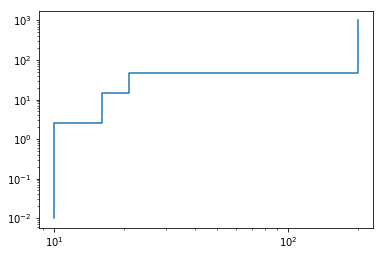

In [28]:
import numpy as np

iteration=300
if iteration%10==0:
    print('.',end='')
    
    
def makeSteps(rs,ts):
    stepr=[]
    stept=[]
    for i in range(len(ts)-1):
        stepr.extend([rs[i],rs[i]])
        stept.extend([ts[i],ts[i+1]])
    return stepr,stept
rs=	[10, 16, 21., 200.];
ts =[2.5, 15. ,47];

rf = np.append(rs,20000);
tf = np.append(np.append(0.01,ts),1000);
r,t=makeSteps(rf,tf)
plt.loglog(r,t)

In [29]:
def VES1dmod(r,t,s): # Yunus Levent Ekinci and Alper Demicri 2008
# % r=	[3 100 20];
# % t =[1.2  23];
# % s=2
    q = 13;
    f = 10;
    m = 4.438;
    x = 0;
    e = np.exp(0.5*np.log(10)/m);
    h = 2*q-2;
    u = s*np.exp(-f*np.log(10)/m-x);
    l = len(r)-1;
    n = 1;
    a=[]
#     print(n+h+1)
    for i in range(0,n+h):
        w = l;
        v = r[l];
        while w>0:
            w = w-1;
            aa = np.tanh(t[w]/u);
            v = (v+r[w]*aa)/(1+v*aa/r[w]);

        a.append(v);
        u = u*e;

    i = 0;
    g = 105*a[i]-262*a[i+2]+416*a[i+4]-746*a[i+6]+1605*a[i+8];
    g = g-4390*a[i+10]+13396*a[i+12]-27841*a[i+14];
    g = g+16448*a[i+16]+8183*a[i+18]+2525*a[i+20];
    g = (g+336*a[i+22]+225*a[i+24])/10000;
    return g
def VES1dmodYunus(r,t,X): # Yunus Levent Ekinci and Alper Demicri 2008
    roa=np.zeros(len(X))
#     for i in range(len(x)):
#     #     s = x(i5);
#         g = VES1dmod (r,t,x[i]);
#         roa[i] = g;
    q = 13;
    f = 10;
    m = 4.438;
    x = 0;
    e = np.exp(0.5*np.log(10)/m);
    h = 2*q-2;

    l = len(r)-1;
    n = 1;    
#     ares=[]
    for si in range(len(X)):
        a=np.zeros(n+h)
        u = X[si]*np.exp(-f*np.log(10)/m-x);
    #     print(n+h+1)
        for i in range(0,n+h):
            w = l;
            v = r[l];
            while w>0:
                w = w-1;
                aa = np.tanh(t[w]/u);
                v = (v+r[w]*aa)/(1+v*aa/r[w]);

            a[i]=v;
            u = u*e;

        i = 0;
        g = 105*a[i]-262*a[i+2]+416*a[i+4]-746*a[i+6]+1605*a[i+8];
        g = g-4390*a[i+10]+13396*a[i+12]-27841*a[i+14];
        g = g+16448*a[i+16]+8183*a[i+18]+2525*a[i+20];
        g = (g+336*a[i+22]+225*a[i+24])/10000;
        roa[si]=g
    return roa


def VES1dmodel(r,t,X,method='ghosh'):
    if method=='ghosh':
#         print('g, ',end='')
        roa=VES1dmodGhosh(r,t,X)
    else:
#         print('y, ',end='')
        roa=VES1dmodYunus(r,t,X)
    return roa
    
# int(1+len(m)/2)
r=	[105, 16, 21., 200.];
t =[2.5, 15. ,47];
roa1=np.zeros_like(roa)
for i in range(len(x)):
    s = x[i];
    g= VES1dmod (r,t,s);
    roa1[i] = g;
print(r,t)
roa2=VES1dmodel(r,t,x,method='yunus')

roa1,roa2,roa1-roa2

[105, 16, 21.0, 200.0] [2.5, 15.0, 47]


(array([ 103.92941051,   97.78625691,   86.17119905,   58.54665453,
          38.51138393,   24.39738999,   18.51348841,   17.72078063,
          17.84961388,   18.25283405,   19.37299203,   20.68989347,
          22.15621559,   25.52706668,   29.36196389,   33.44894654,
          39.68554356,   49.68517267,   58.86926655,   67.23509038]),
 array([ 103.92941051,   97.78625691,   86.17119905,   58.54665453,
          38.51138393,   24.39738999,   18.51348841,   17.72078063,
          17.84961388,   18.25283405,   19.37299203,   20.68989347,
          22.15621559,   25.52706668,   29.36196389,   33.44894654,
          39.68554356,   49.68517267,   58.86926655,   67.23509038]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [30]:
# % Function Jacobian %
def jacobian(x,r,t,roa,roa1,method='ghosh'):
    lr=len(r)
    lt=len(t)
    par = 0.1;
    r2 = np.array(r);
    roa2=roa3=np.zeros_like(roa1)
    A1=[]
    A2=[]
    for i2 in range( lr):
        r2[i2] = (r[i2]*par)+r[i2];
        roa2=VES1dmodel(r2,t,x,method=method) #VES1dmodYunus(r2,t,x)
#         for ii in range(len(x)):
#             g= VES1dmod (r2,t,x[ii]);
#             roa2[ii]= g;
    #     print(roa2)
        A1.append( ((np.array(roa2-roa1)/(r[i2]*par))*r[i2])/roa);
    #     print(A[-1])
        r2 = r.copy();

    t2 = np.array(t);
    for i3 in range(lt):
        t2[i3] = (t[i3]*par)+t[i3];
        roa3=VES1dmodel(r,t2,x,method=method)
#         for ii in range(len(x)):
#             g = VES1dmod (r,t2,x[ii]);
#             roa3[ii] = g;

        A1.append( (np.array(roa3-roa1)/(t[i3]*par))*t[i3]/roa)
        t2 = t.copy();
#     A1.extend(A2);
    return np.array(A1).T
# np.array(A1)
# A1
# jacobian(x,r,t,roa,roa1)

In [31]:
# roa2,roa1,r[i2]*par,
# ((np.array(roa2-roa1)/(r[i2]*par))*r[i2]),((np.array(roa2-roa1)/(r[i2]*par))*r[i2])/roa,roa

In [32]:
# roa

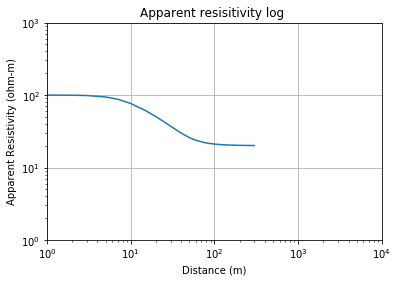

In [33]:
# % VES1dinv %
# % 1D Inversion of Schlumberger Sounding Data %
# % By Yunus Levent Ekinci and Alper Demirci %

# format long;
# load ab2.dat;
import numpy as np
import pandas as pd

ab2=pd.read_csv('ab2.dat',sep='\t', header=None)


x,roa
roac=roa.copy()

# % r = [r1 r2 rn];
# % t = [t1 tn-1];
# x=[x ;[350:100:1500]']
# x=np.append(x,range(350,1551,100))

ra=	[15., 4. ,550. ,6000.];
ta =[5.,  10. ,50.];

# actual=np.append(ra ,ta)
# # method='yunus'
method='ghosh'
# roa=VES1dmodel(ra,ta,x,method=method)
# ab2[1]=roa
def plot_ares(ab2):
    plt.loglog(ab2[0],ab2[1],'-', basex=10)
    plt.grid(True)
    plt.title('Apparent resisitivity log ')
    plt.xlabel('Distance (m)')
    plt.ylabel('Apparent Resistivity (ohm-m)')
    plt.xlim(1,10000)
    plt.ylim(1,1000)

plot_ares(ab2)

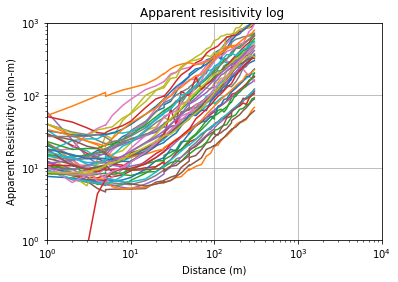

In [37]:
import os
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
for f in os.listdir(base_folder+'mohaba.resp\VESdata')[:50]:
    vdf=pd.read_csv(base_folder+'mohaba.resp\VESdata//'+f,header=None)
#     print(f)
    plot_ares(vdf)
#     print(f[:-3]+': '+str(vdf.values[0:2,1]))
# vdf

In [38]:

def VES1dInv(m,x,roa,method='ghosh',maxiteration=100):
    kr = 10e-10;
    iteration = 1;
#     maxiteration = 100;
    dfit = 1;
    roa1=np.zeros_like(roa)
    lr=int(1+len(m)/2)
    lt=int(len(m)/2)
    print('Processing.',end='')
    while iteration<maxiteration:
#         print(iteration,iteration%10)
        if iteration%10==1:
            print('.',end='')
        iteration +=1
        r = m[:lr];
        t = m[-lt:];
#         for i in range(len(x)):
#             s = x[i];
#             g= VES1dmod (r,t,s);
#             roa1[i] = g;
        roa1=VES1dmodel(r,t,x,method=method)
        e1 = np.array(np.log(roa)-np.log(roa1));
        dd = e1;
        misfit1 = np.dot(e1.T,e1)
    #     if misfit1<kr:
    #         loglog(x,roa,'k.',x,roa1,'k');
    #         axis([1 1000 1 1000])
    #         xlabel('AB/2 (m)');
    #         ylabel('Apparent Resistivity (Ohm-m)');
    #         break

        A= jacobian(x,r,t,roa,roa1,method=method);
    #     U, S, V = svd(A,0);
        U, S, V = np.linalg.svd(A,full_matrices= False)
        ss = len(S);
        say = 1;
        k = 0;

        while say<ss:
        #     say = say+1;
            diagS = S;
            beta = S[say-1]*(dfit**(1/say));
            if beta<10e-5:
                beta = 0.001*say;
            SS=np.zeros((ss,ss))
            for i4 in range(ss):
                SS[i4,i4] = S[i4]/(S[i4]**2+beta);

            dmg = np.linalg.multi_dot([V.T,SS,U.T,dd.T])
            mg = np.exp(np.log(m)+dmg.T);
            r = mg[:lr];
            t = mg[-lt:];
#             print(r,t)


#             roa4=np.zeros_like(roa)
#             for i5 in range(len(x)):
#             #     s = x(i5);
#                 g = VES1dmod (r,t,x[i5]);
#                 roa4[i5] = g;
            roa4=VES1dmodel(r,t,x,method=method)


            e2 = np.array(np.log(roa)-np.log(roa4));
            misfit2 = np.dot(e2.T,e2);

            if misfit2>misfit1:
                'Beta control'
                say = say+1;
                k = k+1;
                if k == ss-1:
                    iteration = maxiteration;
                    say = ss+1;

            else:
                say = ss+1;
                m = mg;
                dfit = (misfit1-misfit2)/misfit1;
                iteration = iteration+1;
                a = iteration;
                if dfit<kr:
                    iteration = maxiteration;
                    say = say+1;
    print('\nIterated %d times '%(iteration))
    return mg,roa1


Processing...........
Iterated 101 times 


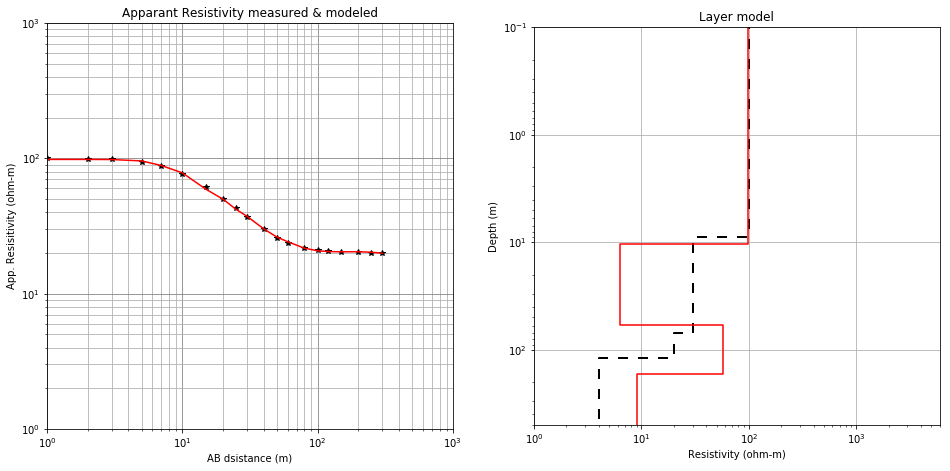

In [39]:
def VESplot(x,roa,roaf,m,mf):
#     t =[0.01]+ta+[1000];
#     r=ra+[np.nan]

    lr=int(1+len(mf)/2)
    lt=int(len(mf)/2)
    rf = np.append(mf[:lr],np.nan);
    tf = np.append(np.append(0.01,mf[-lt:]),1000);
    
    r = np.append(m[:lr],np.nan);
    t = np.append(np.append(0.01,m[-lt:]),1000);
    fig=plt.figure(figsize=(16,10))

    # Resistivity plot
    plt.subplot(121)
    plt.subplots_adjust(hspace=0.4)
    plt.loglog(x,roa,'*k', basex=10)
    plt.loglog(x,roaf,'-r', basex=10)
    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.grid(b=True, which='minor')
    plt.xlim(1,1000)
    plt.ylim(1,1000)
    plt.xlabel('AB dsistance (m)')
    plt.ylabel('App. Resisitivity (ohm-m)')
    plt.gca().set_aspect(1.0)
    plt.title('Apparant Resistivity measured & modeled')

    #Interpretation plot
    plt.subplot(122)
    plt.step(r,np.cumsum(t),'k',dashes=[5, 5, 5, 5],linewidth=2)
    plt.step(rf,np.cumsum(tf), 'r')
    plt.xscale('log')
    plt.yscale('log')

    plt.grid(True)
    plt.ylim(0.1,500)
    plt.xlim(1,6000)
    plt.gca().invert_yaxis()
    plt.xlabel('Resistivity (ohm-m)')
    plt.ylabel('Depth (m)')
    plt.gca().set_aspect(1.0)
    plt.title('Layer model')
ab2=pd.read_csv('ab2.dat',sep='\t', header=None)
x = ab2[0].values;
roa = ab2[1].values;  
ri= [100, 30, 20., 4.];
ti =[9, 61 ,50];
m = np.append(ri,ti)
mf,roaf=VES1dInv(m,x,roa,method=method,maxiteration=100)
# np.set_printoptions(precision=2,suppress=True)
# roa-roaf,np.round(mf)
VESplot(x,roa,roaf,m,mf)

In [15]:
# ri=	[10, 16, 21., 200.];
# ti =[2.5, 15. ,47];
# m = np.append(ri,ti)
# # mf,roaf=VES1dInv(m,x,roa)


# # import timeit
# # t = timeit.Timer(stmt="mf,roaf=VES1dInv(m,x,roa)")  
# # print (t.timeit(5))

# import timeit, functools
# # VES1dInv(m,x,roa,method=method,maxiteration=200)
# t = timeit.Timer(functools.partial(VES1dInv, m,x,roa,method='ghosh',maxiteration=1000)) 
# print (t.timeit(1))
# # mf,roaf,roa-roaf
# # (ra,ta),(r,t)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
# x,roa
# plt.subplot(121)
# plt.loglog(x,roa)

# plt.subplots_adjust(hspace=0.4)

# # log x and y axis

# plt.loglog(x,roa,'*r', basex=10)
# plt.loglog(x,roa4,'.g', basex=10)
# # plt.loglog(dist,rt,'*g', basex=10)
# # plt.loglog(OA[13:],ares2[13:],'.b', basex=10)
# plt.grid(True)
# plt.xlim(1,1000)
# plt.ylim(1,1000)
# plt.subplot(122)
# plt.title('loglog ')

In [ ]:

# observed = roa;
# calculated = roa4;
# h = legend('obs','cal');
# format bank;
# m
# rr = [0,r];
# tt = [0,cumsum(t),max(t)*10];
# subplot(1,2,2),
# stairs(rr,tt,'k-');
# rrr = [0,rinitial];
# ttt = [0,cumsum(tinitial),max(t)*10];
# hold on;
# subplot(1,2,2),
# stairs(rrr,ttt,'k--');
# set(gca,'Ydir','reverse');
# set(gca,'Xscale','log');
# ylim([0 150]);
# xlim([1 2000]);
# xlabel('Resistivity (Ohm-m)');
# ylabel('Depth (m)');
# rms = norm(roa4-roa) /sqrt(length(roa));
# % roa4
# actual

In [198]:
# # beta
# # np.dot(V.T,SS)
# # np.linalg.multi_dot([V.T,SS,U.T,dd])
# # S[say]*(dfit**(1/say))
# # V,SS
# dmg
# mg=np.exp(np.log(m)+dmg.T)
# r = mg[:lr];
# t = mg[-lt:];
# r,t

(array([  97.73736918,    7.20549298,   18.21864011,  507.9544164 ]),
 array([  6.53873388,   7.25768862,  38.18227916]))

In [199]:
# # np.dot(np.dot(V,SS,U.T),dd.T)
# # dd
# # say = say+1;
# diagS = S;
# beta = S[say-1]*(dfit**(1/say));
# if beta<10e-5:
#     beta = 0.001*say;
# SS=np.zeros((ss,ss))
# for i4 in range(ss):
#     SS[i4,i4] = S[i4]/(S[i4]**2+beta);

# dmg = np.linalg.multi_dot([V.T,SS,U.T,dd.T])
# mg = np.exp(np.log(m)+dmg.T);
# r = mg[:lr];
# t = mg[-lt:];
# # np.linalg.multi_dot([V.T,SS,U.T,dd.T])

# mg

array([  97.73736918,    7.20549298,   18.21864011,  507.9544164 ,
          6.53873388,    7.25768862,   38.18227916])